In [ ]:
#default_exp models

In [ ]:
#export
from fastai.text.all import *

In [ ]:
#hide
%load_ext autoreload
%autoreload 2

# Models
> Here we define the different models

In [ ]:
#export
class SimpleLSTM(Module):
    "Cheap and simple LSTM running through the trajectories."
    def __init__(self, dim, h_size, vocab_sz, bs, n_layers=1, bidir=False, yrange=(0, 2.05)):
        self.rnn = nn.LSTM(dim, h_size, n_layers, batch_first=True, bidirectional=bidir)
        self.h_o = nn.Linear(h_size, vocab_sz)
        self.h = [torch.zeros(n_layers, bs, h_size) for _ in range(2)] # In case we do a generative
        self.sigmoid = SigmoidRange(*yrange)
        
    def forward(self, x):
        res, h = self.rnn(x)
        self.h = [h_.detach() for h_ in h]
        avg_pool = res.mean(1) # Need to do this properly and concat with max & last pooling
        out = self.h_o(avg_pool)
        return self.sigmoid(out).squeeze()
    
    def reset(self): 
        for h in self.h: h.zero_()

In [ ]:
# class TrajectoryLearner(Learner):
#     "Custom learner for trajectories"
#     def __init__(self, dls, model, **kwargs):
#         super().__init__(dls, model, path=Path(".."), **kwargs)

In [ ]:
#hide
from andi_unicorns.data import get_discriminative_dls

In [ ]:
bs = 512
dls = get_discriminative_dls(1, dim=1, bs=bs)
my_lstm = SimpleLSTM(dim=1, h_size=200, n_layers=2, vocab_sz=1, bs=bs)

In [ ]:
learn = Learner(dls, my_lstm, loss_func=L1LossFlat(), path=Path(".."))

SuggestedLRs(lr_min=0.19054607152938843, lr_steep=1.5848932266235352)

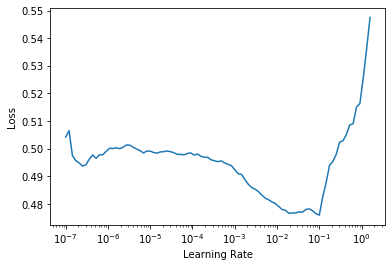

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(20, lr_max=1e-2)

epoch,train_loss,valid_loss,time
0,0.480675,0.457632,00:06
1,0.469124,0.455228,00:06
2,0.459526,0.455297,00:06
3,0.456676,0.458143,00:06
4,0.455993,0.452877,00:06
5,0.452940,0.450441,00:06
6,0.453736,0.451169,00:06
7,0.452826,0.452540,00:06
8,0.449670,0.453951,00:06
9,0.443756,0.438794,00:06


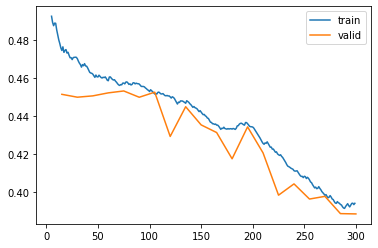

In [ ]:
learn.recorder.plot_loss()

In [ ]:
learn.save('most_basic')

Path('models/most_basic.pth')

# Export-

In [ ]:
from nbdev.export import notebook2script
notebook2script()

Converted 00_data.ipynb.
Converted 01_models.ipynb.
Converted index.ipynb.
